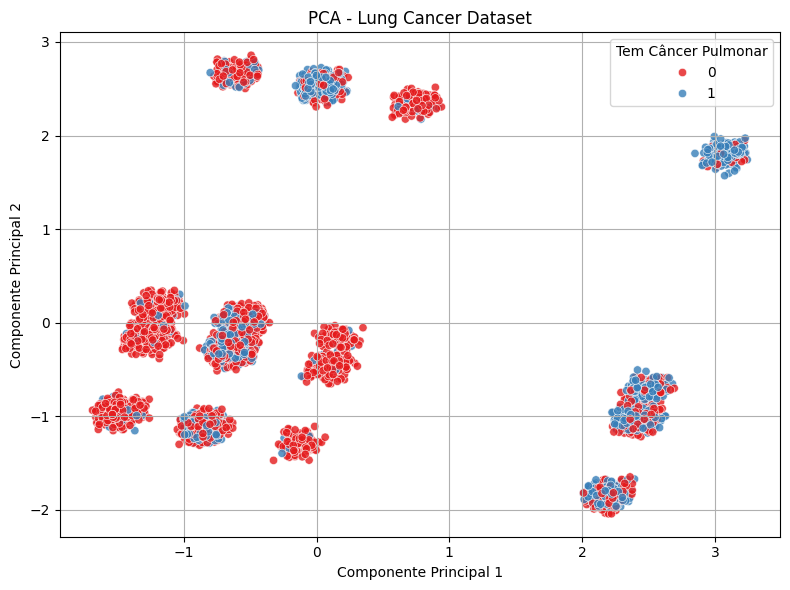

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset
url = "data/LungCancerDataset.csv"
df = pd.read_csv(url)

# 2. Separar features e target
X = df.drop(columns=['PULMONARY_DISEASE'])
y = df['PULMONARY_DISEASE']

# Transformar target para melhor visualização (categorias)
y = y.map({'YES': 1, 'NO': 0})

# 3. Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Criar DataFrame com os componentes principais
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['PULMONARY_DISEASE'] = y

# 6. Visualizar os resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='PULMONARY_DISEASE', palette='Set1', alpha=0.8)
plt.title('PCA - Lung Cancer Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tem Câncer Pulmonar')
plt.grid(True)
plt.tight_layout()
plt.show()
